In [18]:
import pandas as pd
import numpy as np

In [23]:
df = pd.read_csv('train.csv', sep=',')
df = df.dropna(subset=['Age'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Separación y evaluación del modelo con un conjunto de prueba y un conjunto de validación (Train/Test/Validation).
Diagnóstico y explicación el grado de bias o sesgo: bajo medio alto
Diagnóstico y explicación el grado de varianza: bajo medio alto
Diagnóstico y explicación el nivel de ajuste del modelo: underfitt fitt overfitt

In [24]:
df.corr()

C:\Users\Alfre\AppData\Local\Temp\ipykernel_21676\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.029340,-0.035349,0.036847,-0.082398,-0.011617,0.009592
Survived,0.029340,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.268189
Pclass,-0.035349,-0.359653,1.000000,-0.369226,0.067247,0.025683,-0.554182
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.082398,-0.017358,0.067247,-0.308247,1.000000,0.383820,0.138329
Parch,-0.011617,0.093317,0.025683,-0.189119,0.383820,1.000000,0.205119
Fare,0.009592,0.268189,-0.554182,0.096067,0.138329,0.205119,1.000000


In [53]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


### Separación y evaluación del modelo con un conjunto de prueba y un conjunto de validación (Train/Test/Validation).


In [27]:
from sklearn.model_selection import train_test_split

# slpit df in train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis = 1), df['Survived'], test_size=0.1, random_state=77)

### Diagnóstico y explicación el nivel de ajuste del modelo: underfitt fitt overfitt

In [28]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Cargar el conjunto de datos del Titanic (puedes descargarlo desde Kaggle u otras fuentes)
data = pd.read_csv('train.csv')

# Explorar y preprocesar los datos
# Aquí debes realizar la limpieza y selección de características según tus necesidades.

# Ejemplo de preprocesamiento simple: eliminar columnas no deseadas y rellenar valores faltantes
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Inicializar y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f'Exactitud (Accuracy): {accuracy}')
print('Matriz de Confusión:')
print(confusion)
print('Reporte de Clasificación:')
print(classification_report_str)

# Visualizar los coeficientes de la regresión logística si es necesario
# Esto te permitirá ver cómo cada característica afecta a la probabilidad de sobrevivir
coeficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print(coeficients)


Exactitud (Accuracy): 0.8444444444444444
Matriz de Confusión:
[[46  8]
 [ 6 30]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        54
           1       0.79      0.83      0.81        36

    accuracy                           0.84        90
   macro avg       0.84      0.84      0.84        90
weighted avg       0.85      0.84      0.85        90

      Feature  Coefficient
0      Pclass    -1.014979
1         Age    -0.033029
2       SibSp    -0.319147
3       Parch    -0.074306
4        Fare     0.001887
5    Sex_male    -2.585504
6  Embarked_Q    -0.089809
7  Embarked_S    -0.382955


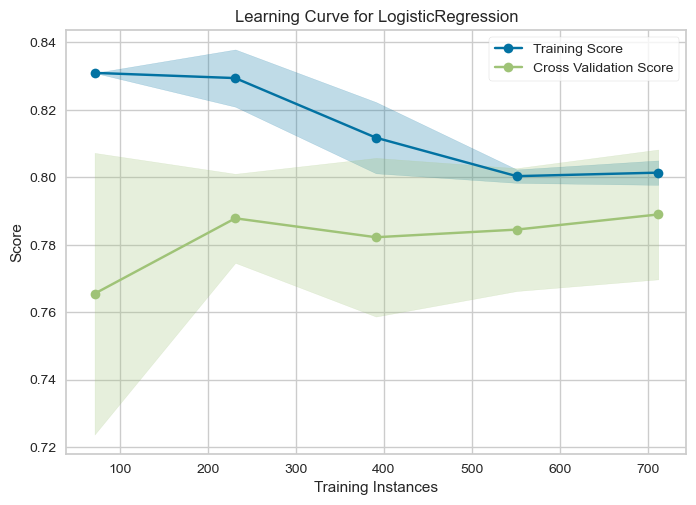

<AxesSubplot:title={'center':'Learning Curve for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [29]:
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import StratifiedKFold

# Crear un objeto LearningCurve
cv = StratifiedKFold(n_splits=5)
lc_viz = LearningCurve(
    model, cv=cv, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 5)
)

# Ajustar el objeto LearningCurve a tus datos
lc_viz.fit(X, y)

# Visualizar la curva de aprendizaje
lc_viz.show()


Podemos ver que le learning curve se ve bien, parten separados el la grafica de entrenamiento d la de cross validation y conforme van aumentando las iteraciones estas 2 lineas van conevrgiendo pero no se cruzan, lo que nos indica un buena curva de aprendizaje sin over o underfitting

### Basándote en lo encontrado en tu análisis utiliza técnicas de regularización o ajuste de parámetros para mejorar el desempeño de tu modelo y documenta en tu reporte cómo mejoró este.


Basado en los resultados anteriores lo que vamos a intentar es mejorar nuestro modelo mejorando los hiperparametros del mismo, para esto vamos a usar una libreria que se llama optuna la cual nos va a ayudar a lograr nuestro objetivo

In [51]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define la función objetivo para la optimización de hiperparámetros
def objective(trial):
        # Cargar el conjunto de datos del Titanic (puedes descargarlo desde Kaggle u otras fuentes)
    data = pd.read_csv('train.csv')

    # Explorar y preprocesar los datos
    # Aquí debes realizar la limpieza y selección de características según tus necesidades.

    # Ejemplo de preprocesamiento simple: eliminar columnas no deseadas y rellenar valores faltantes
    data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
    data['Age'].fillna(data['Age'].mean(), inplace=True)
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
    data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)
    # Carga tus datos y divide en conjuntos de entrenamiento y prueba
    # Reemplaza 'X' y 'y' con tus datos reales
    X = data.drop('Survived', axis=1)
    y = data['Survived']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    # Define los hiperparámetros a optimizar
    C = trial.suggest_loguniform('C', 1e-5, 1e5)
    solver = trial.suggest_categorical('solver', ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'])
    penalty = trial.suggest_categorical('penalty', [None, 'l2'])  # regularizacion


    # Crea y entrena el modelo de regresión logística con los hiperparámetros sugeridos
    model = LogisticRegression(C=C, solver=solver, random_state=42)
    model.fit(X_train, y_train)

    # Realiza predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcula la métrica de rendimiento (por ejemplo, precisión)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Crea un objeto de estudio Optuna
study = optuna.create_study(direction='maximize')

# Ejecuta la optimización de hiperparámetros
study.optimize(objective, n_trials=100)

# Obtiene los mejores hiperparámetros encontrados
best_params = study.best_params
best_accuracy = study.best_value

print("Mejores hiperparámetros:", best_params)
print("Mejor precisión encontrada:", best_accuracy)


[I 2023-09-11 10:00:21,706] A new study created in memory with name: no-name-b996c7fc-20a6-4712-90bc-b19e29cdaf59


C:\Users\Alfre\AppData\Local\Temp\ipykernel_21676\2005620785.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e5)
c:\Users\Alfre\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2023-09-11 10:00:21,745] Trial 0 finished with value: 0.7111111111111111 and parameters: {'C': 0.572572235920487, 'solver': 'saga', 'penalty': 'l2'}. Best is trial 0 with value: 0.7111111111111111.
C:\Users\Alfre\AppData\Local\Temp\ipykernel_21676\2005620785.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_logunifo

Mejores hiperparámetros: {'C': 0.0601792487306341, 'solver': 'lbfgs', 'penalty': 'l2'}
Mejor precisión encontrada: 0.8888888888888888


In [52]:
from sklearn.metrics import classification_report

data = pd.read_csv('train.csv')

# Explorar y preprocesar los datos
# Aquí debes realizar la limpieza y selección de características según tus necesidades.

# Ejemplo de preprocesamiento simple: eliminar columnas no deseadas y rellenar valores faltantes
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)
# Carga tus datos y divide en conjuntos de entrenamiento y prueba
# Reemplaza 'X' y 'y' con tus datos reales
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Obtén los mejores hiperparámetros encontrados durante la optimización
best_params = study.best_params

# Crea y entrena un nuevo modelo de regresión logística con los mejores hiperparámetros
best_model = LogisticRegression(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Genera el informe de clasificación
classification_rep = classification_report(y_test, y_pred)

# Imprime el informe de clasificación
print("Informe de Clasificación del Mejor Modelo:")
print(classification_rep)


Informe de Clasificación del Mejor Modelo:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        54
           1       0.88      0.83      0.86        36

    accuracy                           0.89        90
   macro avg       0.89      0.88      0.88        90
weighted avg       0.89      0.89      0.89        90



c:\Users\Alfre\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Hay que tomar en cuenta que para la parte de usar tecnicas de regularizacion algunas de las opciones de solver no son compatibles con todas las tecnicas de regularizacion por lo que, mediante prueba y error conclui que el mejor solver era lbfgs y solamente usé tecnicas de regularizacion commpatibles (por si se pregunta porque no se usaron todas las tecnicas de regularizacion)

In [32]:
from sklearn.metrics import confusion_matrix

# Obtén la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_pred)

# Imprime la matriz de confusión
print("Matriz de Confusión:")
print(confusion_mat)

Matriz de Confusión:
[[50  4]
 [ 6 30]]


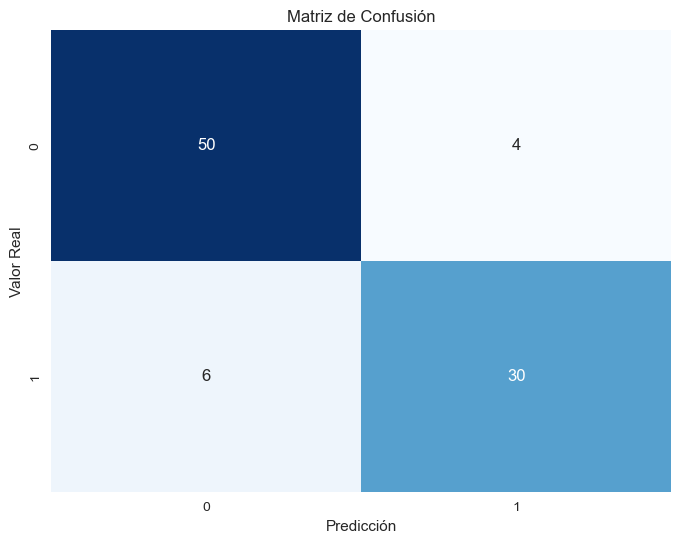

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtén la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_pred)

# Crea un mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()


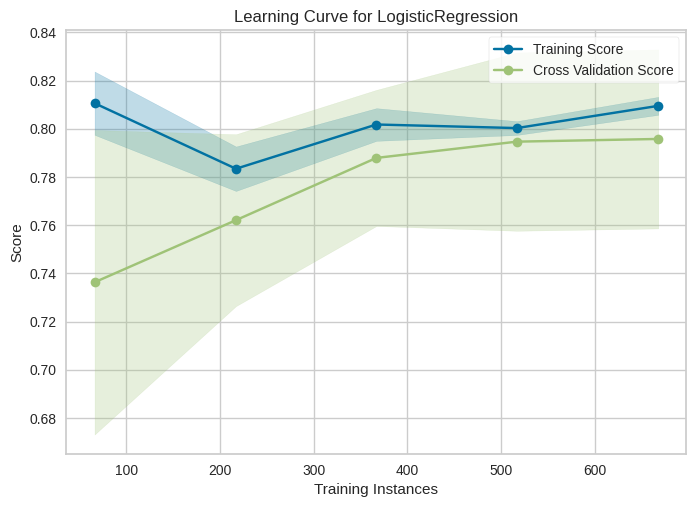

<Axes: title={'center': 'Learning Curve for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [34]:
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import StratifiedKFold

# Crear un objeto LearningCurve
cv = StratifiedKFold(n_splits=4)
lc_viz = LearningCurve(
    best_model, cv=cv, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 5)
)

# Ajustar el objeto LearningCurve a tus datos
lc_viz.fit(X, y)

# Visualizar la curva de aprendizaje
lc_viz.show()

Podemos ver que con respecto a la iteracion inicial logramos mejorar en aproximadamente 0.05 algo bastante bueno en cuanto a las predicciones y esto solamente haciendo la optimizacion de los hiperparametros, dejando de lado una de las cosas que creo que podrían ayudar bastante a este caso como elfeature engineering. Respecto a la curva de aprendizaje vemos que se ajusta mejor porque las curvas están más juntas entre ellas pero sin llegar al over o underfitting.

### Diagnóstico y explicación el grado de bias o sesgo: bajo medio alto


![Learning Curve del modelo](images/image.png)

En esta grafica se puede ver que conforme aumenta el tamaño del conjunto de entrenamiento, el rendimiento en el conjunto de prueba también mejora. Esta convergencia gradual entre el rendimiento en el conjunto de entrenamiento y el conjunto de prueba es una señal muy positiva. Muestra que el modelo no solo se está ajustando a los datos de entrenamiento (lo que podría indicar sobreajuste o alto sesgo), sino que también está generalizando bien a datos nuevos y no vistos. 



### Diagnóstico y explicación el grado de varianza: bajo medio alto


![Classification Report del modelo](images/cr.png)

En las metricas de evaluacion de nuestro modelo al realizar el refinamiento pudimos ver una mejora en las metricas de este, por lo que, podemos decir que el grado de varianza es bajo, ya que, el modelo no esta sobreajustado a los datos de entrenamiento y generaliza bien a datos nuevos y no vistos. Cosa que confirma la grafica de la curva de aprendizaje y la matriz de confusion.

![Classification Report del modelo](images/cm.png)

En la matriz de confusion podemos ver que igualmente se presenta una varianza del modelo baja, esto debido a que los valores de la diagonal son los mas altos y los que estan fuera de la diagonal son los mas bajos, lo que nos indica que el modelo esta prediciendo bien los valores de la clase 0 y 1 y no hay un sobreajuste o subajuste de los datos que nos aumente la varianza del modelo.

![Learning Curve del modelo](images/LR2.png)

Las curvas de entrenamiento y validación están convergiendo y son cercanas entre sí, es probable que el modelo tenga una baja varianza. Si están muy separadas, el modelo puede estar sobreajustando pero nosotros estamos en el caso contratio.